In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
from pydataset import data
import evaluate

warnings.filterwarnings('ignore')

Load the tips dataset from either pydataset or seaborn.

In [13]:
df = data('tips')

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:
```json
{
    model = ols('y ~ x', data=df).fit()
    predictions = model.predict(df.x)
}
```

The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [15]:
from statsmodels.formula.api import ols

In [16]:
x = df['tip']
y = df['total_bill']

In [17]:
df['baseline'] = df.total_bill.mean()

In [18]:
model = ols('total_bill ~ tip', data=df).fit()
df['yhat'] = model.predict(x)

Plot the residuals for the linear regression model that you made.

In [19]:
df.head()


,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,11.141475
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,13.967489
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,21.967283
4,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,21.141218
5,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,22.445532


In [20]:
df['residual'] = df.yhat - y
df['residual_baseline'] = df.baseline - y

In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,11.141475,-5.848525,2.795943
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,13.967489,3.627489,9.445943
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,21.967283,0.957283,-1.224057
4,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,21.141218,-2.538782,-3.894057
5,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,22.445532,-2.144468,-4.804057


In [23]:
plt.fig(figsize=(10,8))

plt.subplot(211)
plt.scatter(x, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals')

plt.subplot(212)
plt.scatter(x, df.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

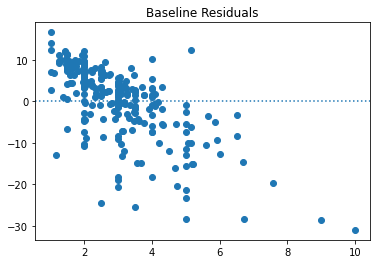

Text(0.5, 1.0, 'Baseline and OLS regression model')

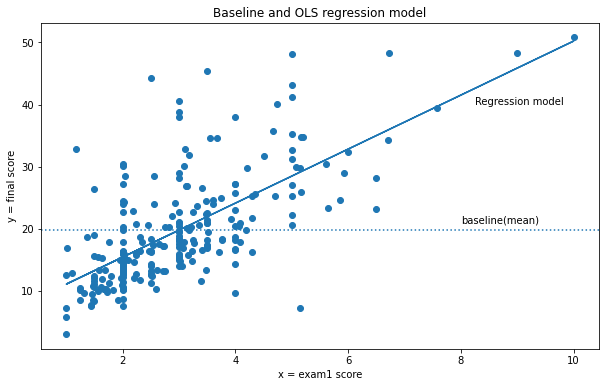

In [13]:
fig = plt.figure(figsize = (10,6))
plt.scatter(x, y)
plt.axhline(y = y.mean(), ls = ':')
plt.plot(x, df.yhat)
plt.text(8,21, 'baseline(mean)')
plt.text(8.25,40, 'Regression model')
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score')
plt.title('Baseline and OLS regression model')

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [14]:

# y = df['total_bill']
# yhat = 

In [15]:
SSE = mean_squared_error(y, df['yhat'])*len(df)
SSE_baseline = mean_squared_error(y, df['baseline'])*len(df)
SSE, SSE_baseline

(10464.729955151068, 19258.46408319672)

In [16]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)
MSE, MSE_baseline

(42.88823752111093, 78.92813148851114)

In [17]:
ESS = sum((df.yhat - y.mean())**2)
ESS

8793.734128045635

In [18]:
TSS = ESS + SSE
TSS 

19258.464083196704

In [19]:
RMSE = sqrt(mean_squared_error(y, df.yhat))
RMSE_baseline = sqrt(mean_squared_error(y, df.baseline))
RMSE, RMSE_baseline

(6.548911170653556, 8.884150577771132)

In [20]:
R2 = ESS/TSS
R2

0.4566165863516758

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [21]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric   model_error
0    SSE  10464.729955
1    MSE     42.888238
2   RMSE      6.548911
          metric   model_error
0   SSE_baseline  19258.464083
1   MSE_baseline     78.928131
2  RMSE_baseline      8.884151


In [22]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,10464.729955,-8793.734128
1,MSE,42.888238,-36.039894
2,RMSE,6.548911,-2.335239


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        14:55:00   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval)
print(f'The R-squared/explained variance score = {R2}')

p-value for model significance =  6.692470646863541e-34
The R-squared/explained variance score = 0.4566165863516758


In [24]:
evs = explained_variance_score(y, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457
